In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

Начинаем с загрузки данных. Для имен столбцов у есть  файл словаря, поэтому можно быстро ознакомиться с ними.

In [2]:
train = pd.read_csv('Housing_Prices_Competition/train.csv')
test = pd.read_csv('Housing_Prices_Competition/test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Столбец Id выглядит бесполезным, можно безопасно удалить его с обоих множеств. Сохраняем нашу целевую переменную (SalePrice) в другой переменной.

In [9]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [10]:
y = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Анализ данных

Начинаем с базовой корреляционной таблицы. С помощью этой таблицы можно понять некоторые линейные отношения между различными функциями.

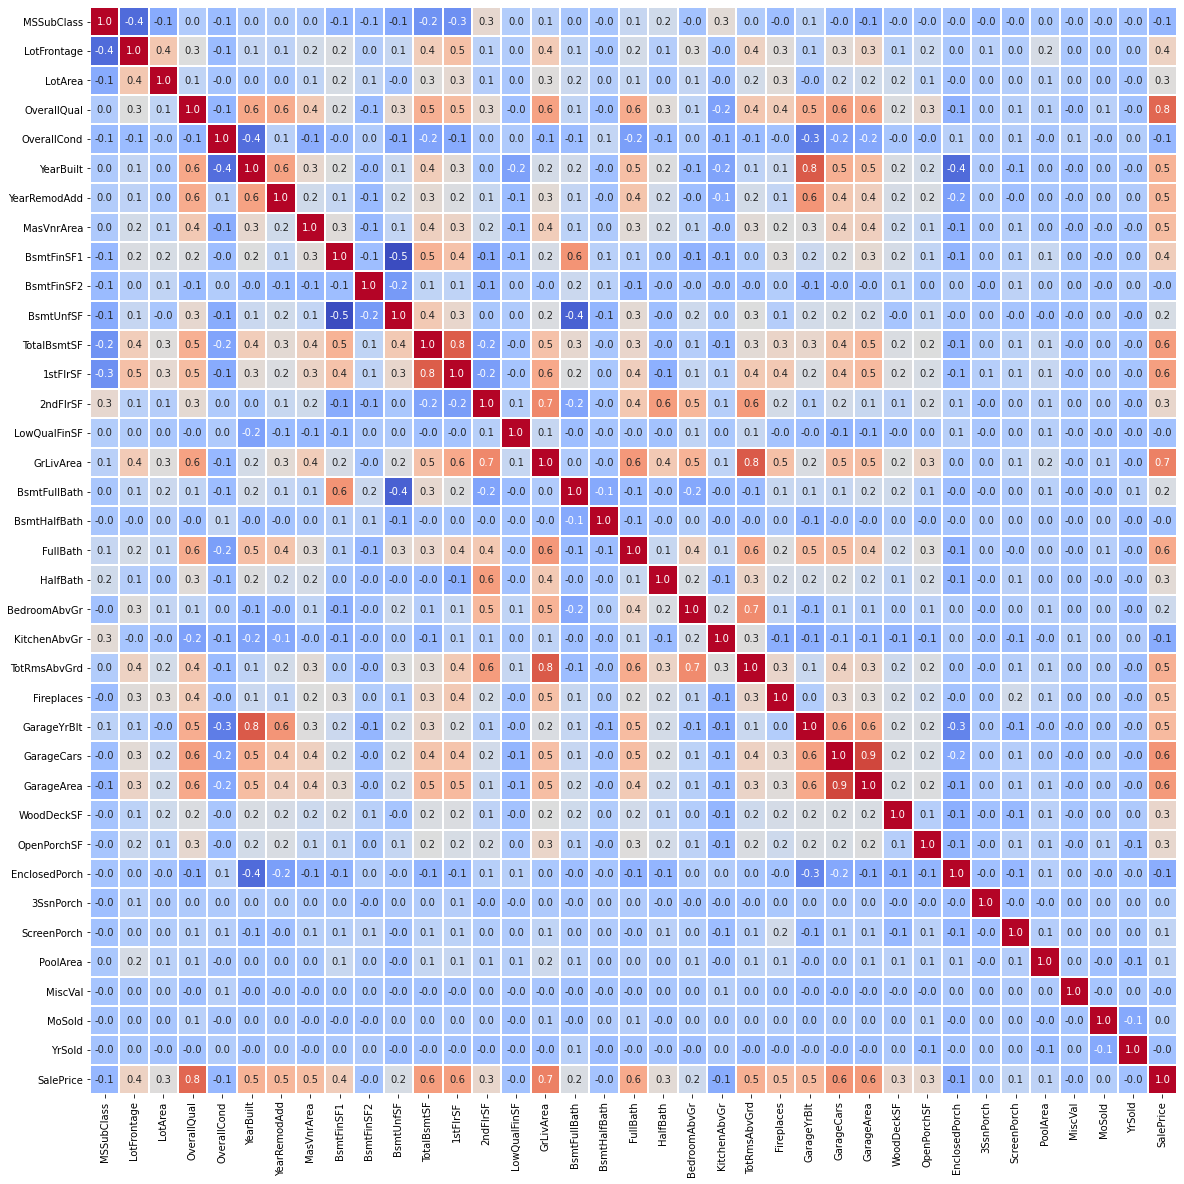

In [11]:
correlation_train = train.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            linewidths=1,
            cbar=False)

Выводы:
- Существует сильная связь между общим качеством домов (OverallQual) и их продажной ценой.
- Жилое помещение (GrLivArea) также является сильным индикатором продажной цены.
- Характеристики гаража, количество ванных и спальных комнат, год постройки здания и т.д. также влияют на цену на разных уровнях.

Объединяем наборы данных, прежде чем начнем их редактировать, чтобы не пришлось выполнять эти операции дважды.

In [12]:
features = pd.concat([train_features, test_features]).reset_index(drop=True)
print(features.shape)

(2919, 79)


## Пропущенные данные

Нужно обнаружить недостающие значения, а затем нужно избавиться от них.

In [13]:
def missing_percentage(df):
    """Функция для возврата соотношений недостающих значений."""
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

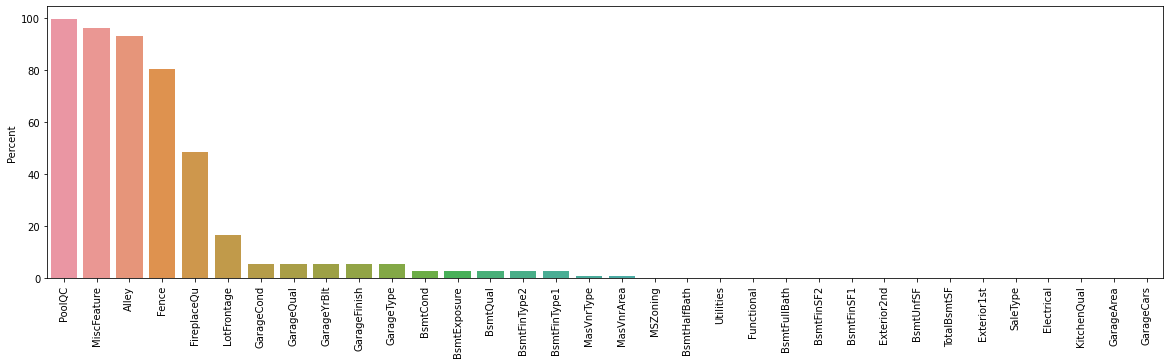

In [14]:
missing = missing_percentage(features)

plt.figure(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing)
plt.xticks(rotation=90)

### Исправляем недостающие данные

1. Сначала заполняем NaN в столбцах, где они означают None.
2. Затем заполняем числовые столбцы, в которых отсутствуют значения, указывающие на отсутствие родительского объекта для измерения, поэтому заменяем их нулями.
3. Даже при наличии некоторых фактически отсутствующих данных, проверяя общие тенденции этих признаков, можем заполнить их наиболее частыми значениями (с помощью mode).
4. MSZoning можно заполнить их наиболее распространенным значением соответствующего типа MSSubClass.
5. Заполняем LotFrontage аналогичным подходом.

In [15]:
# Список признаков, где NaN означает None.

none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

# Список признаков, где NaN означает 0.

zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# Список признаков, где NaN можно заполнить с помощью mode.

freq_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities'
]


for col in zero_cols:
    features[col].replace(np.nan, 0, inplace=True)

for col in none_cols:
    features[col].replace(np.nan, 'None', inplace=True)

for col in freq_cols:
    features[col].replace(np.nan, features[col].mode()[0], inplace=True)

In [16]:
# Заполнение MSZoning согласно MSSubClass.

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].apply(
    lambda x: x.fillna(x.mode()[0]))

In [17]:
# Заполнение LotFrontage согласно Neighborhood.

features['LotFrontage'] = features.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [18]:
# Числовые характеристики, которые должны рассматриваться как категории

features['MSSubClass'] = features['MSSubClass'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# Feature Engineering

Начнём с группировки некоторых редких значений. Они не добавляют много смысла, поэтому, если они встречаются менее 10 раз в наблюдениях, они попадают в группу 'Other'.

In [20]:
# Преобразование редких значений (менее 10) в одну группу.

others = [
    'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Heating', 'Electrical', 'Functional', 'SaleType']

for col in others:
    mask = features[col].isin(
        features[col].value_counts()[features[col].value_counts() < 10].index)
    features[col][mask] = 'Other'

In [21]:
def srt_box(y, df):
    '''Функция для отображения категориальных переменных.'''
    
    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    print('do: ', axes)
    axes = axes.flatten()
    print('posle: ', axes)

    for i, j in zip(df.select_dtypes(include=['object']).columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()

# Категориальные данные

Xотелось бы увидеть взаимосвязь между категориальными данными и цедевой переменной (SalePrice). Boxplots кажутся достойным способом проверить этот тип отношений. Также отсортируем их по среднему значению этой группы.

do:  [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000030A73DF970>
posle:  [<matplotlib.axes._subplots.AxesSubplot object at 0x00000030A73DF970>


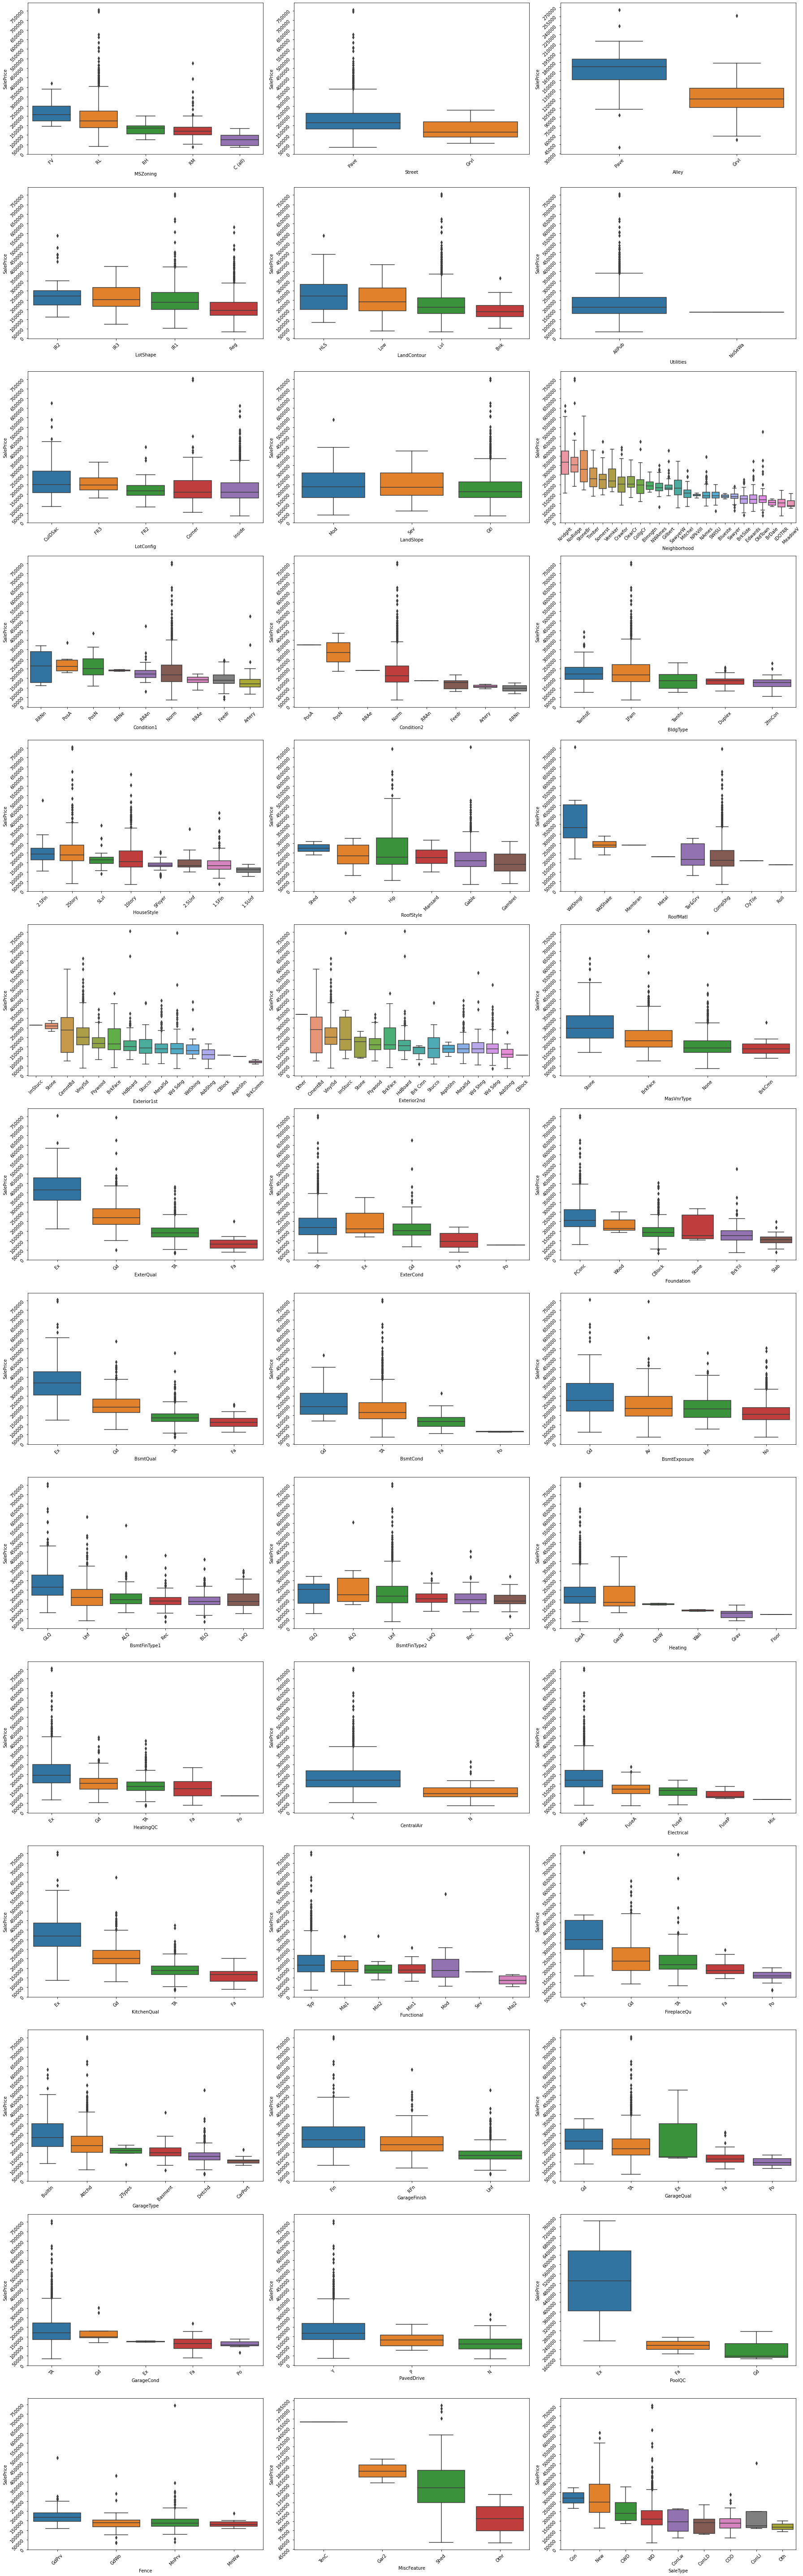

In [22]:
srt_box('SalePrice', train)

#### Выводы

**MSZoning;**
 - FV дома имеют наивысшее медианное значение.
 - Жилые дома с низкой плотностью застройки (RL) занимают второе место с некоторыми отклонениями.
 - Жилой максимум (Rh) и минимум (RM) кажутся похожими, в то время как коммерческий (C) самый низкий.

**LandContour;** 
 - Дома на склоне холма (HSL) кажутся немного дороже остальных, в то время как BNK дома самые низкие.

**Neighborhood;**
 - Northridge Heights, Northridge и Timberland входят в тройку самых дорогих мест для жилья.

**Conditions;**
 - Близость к Северо-Южной железной дороге, похоже, положительно сказывается на цене.
 - Нахождение рядом с положительными внешними объектами (парком, зеленью и т.д.) увеличивает цену.
 
**MasVnrType;** 
 - Каменная облицовка кажется более выгодной по цене, чем кирпичная.

**CentralAir;** 
 - Наличие системы кондиционирования положительно сказывается на цене.

**GarageType;**
 - Дома с гаражном самые дорогие.

Можно преобразовать некоторые из этих категорий в числовые, особенно те, которые связаны с качеством определенных признаков.

In [23]:
# Преобразование некоторых категориальных значений в числовые. 
# Выбор одинаковых значений для более близких групп.

neigh_map = {
    'MeadowV': 1, 'IDOTRR': 1, 'BrDale': 1,
    'BrkSide': 2, 'OldTown': 2, 'Edwards': 2,
    'Sawyer': 3, 'Blueste': 3, 'SWISU': 3, 'NPkVill': 3, 'NAmes': 3,
    'Mitchel': 4,
    'SawyerW': 5, 'NWAmes': 5, 'Gilbert': 5, 'Blmngtn': 5, 'CollgCr': 5,
    'ClearCr': 6, 'Crawfor': 6,
    'Veenker': 7, 'Somerst': 7,
    'Timber': 8,
    'StoneBr': 9,
    'NridgHt': 10, 'NoRidge': 10
}
features['Neighborhood'] = features['Neighborhood'].map(neigh_map).astype(
    'int')

ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['ExterQual'] = features['ExterQual'].map(ext_map).astype('int')
features['ExterCond'] = features['ExterCond'].map(ext_map).astype('int')

bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['BsmtQual'] = features['BsmtQual'].map(bsm_map).astype('int')
features['BsmtCond'] = features['BsmtCond'].map(bsm_map).astype('int')
features['FireplaceQu'] = features['FireplaceQu'].map(bsm_map).astype('int')
features['GarageCond'] = features['GarageCond'].map(bsm_map).astype('int')
features['GarageQual'] = features['GarageQual'].map(bsm_map).astype('int')

bsmf_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}
features['BsmtFinType1'] = features['BsmtFinType1'].map(bsmf_map).astype('int')
features['BsmtFinType2'] = features['BsmtFinType2'].map(bsmf_map).astype('int')

heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['HeatingQC'] = features['HeatingQC'].map(heat_map).astype('int')
features['KitchenQual'] = features['KitchenQual'].map(heat_map).astype('int')

# Числовые данные

Построим диаграммы разброса (scatter plot). Также строим линии полиномиальной регрессии, чтобы увидеть общую тенденцию. Таким образом можно понять числовые значения и их важность для продажной цены, а также выявить выбросы.

In [24]:
# Построение числовых характеристик с полиномиальной регрессией для обнаружения выбросов на глаз.

def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):
        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

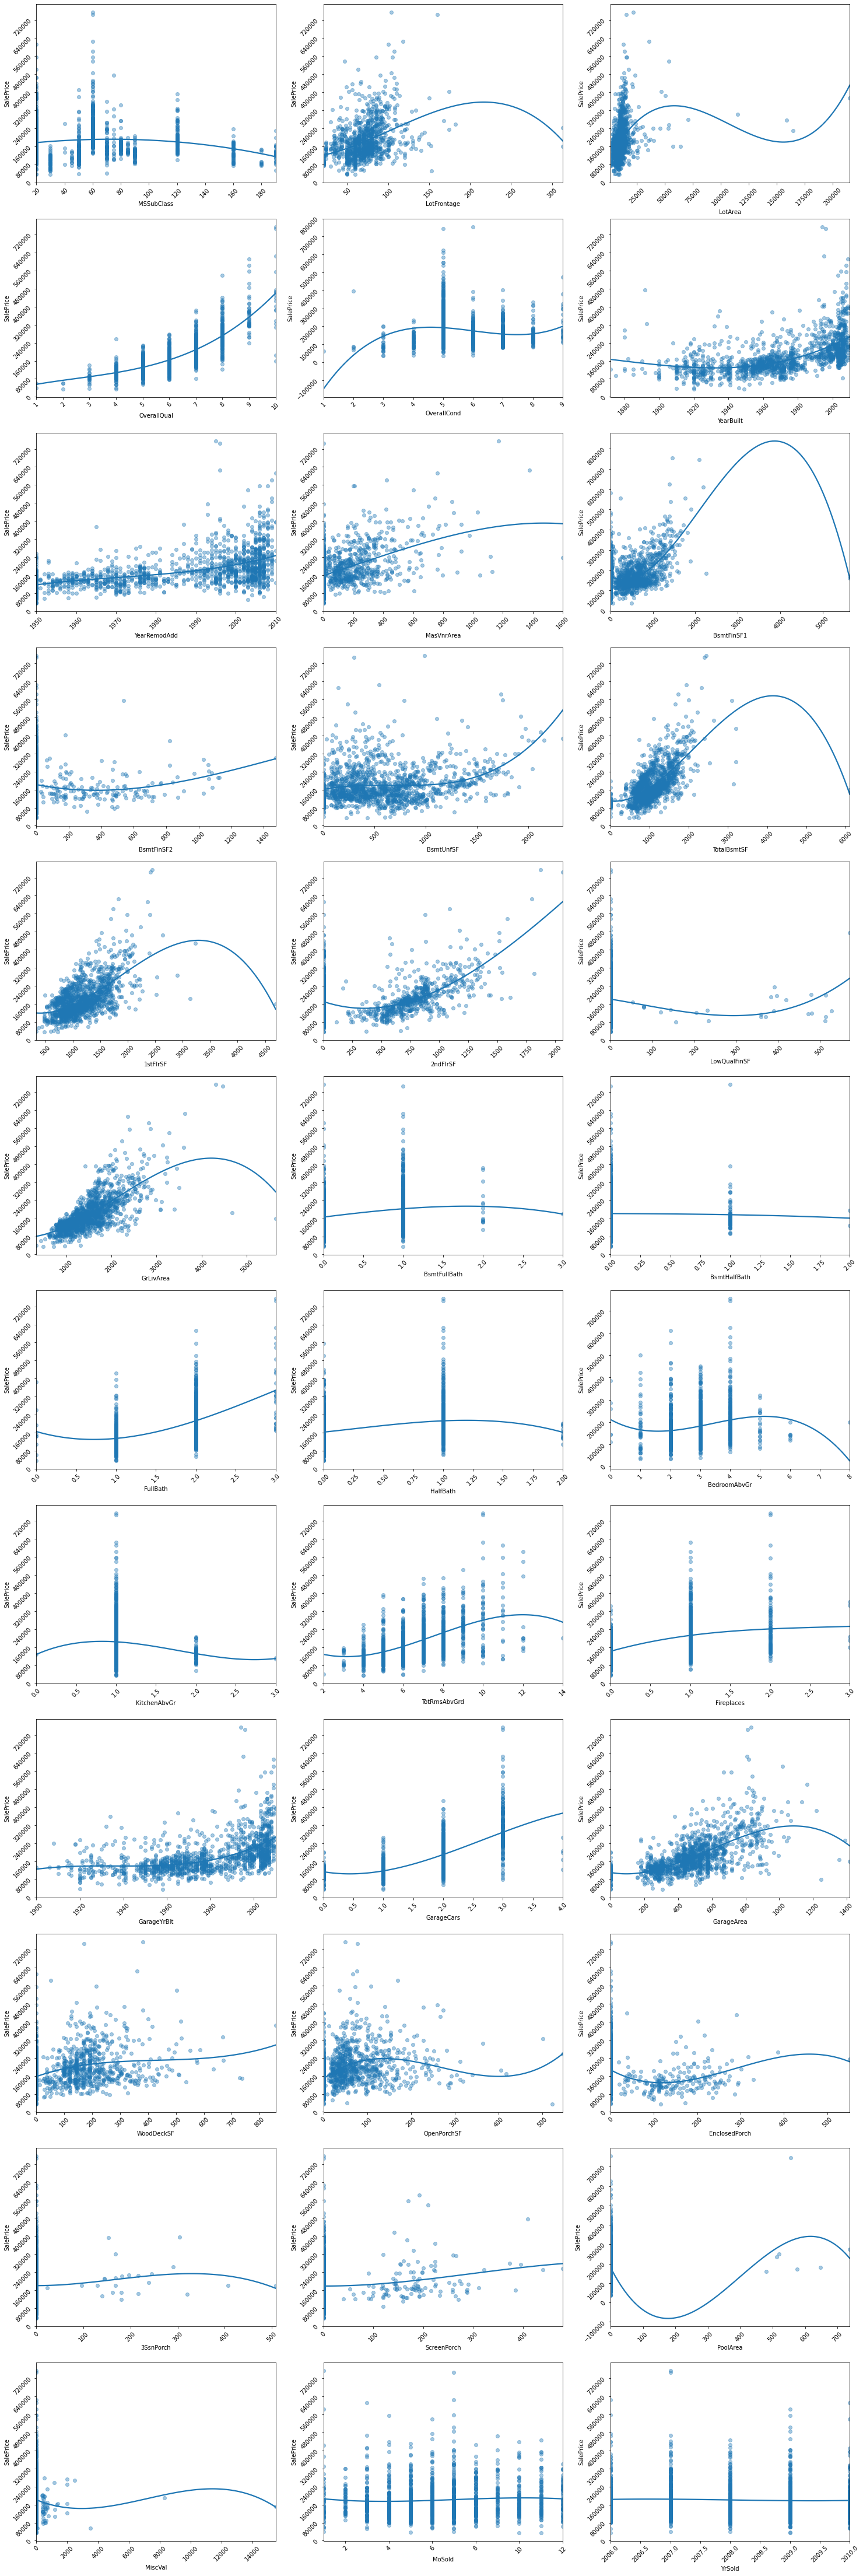

In [25]:
srt_reg('SalePrice', train)

#### Выводы

**OverallQual;**
- Хорошо видно, что цена продажи дома повышается с увеличением общего качества.

**YearBuilt;**
- Новостройки обычно дороже.

**Basement;**
- Большие подвалы повышают цену, но присутствуют некоторые выбросы.

**GrLivArea;**
- Этот признак довольно линеен, но можно выделить два выброса, влияющих на эту тенденцию. Есть несколько огромных домов с довольно дешевыми ценами.

**SaleDates;**
- Кажутся несущественными, можно их удалить.

## Выбросы

Отбросим обнаруженные выбросы.

In [26]:
features = features.join(y)
features = features.drop(features[(features['OverallQual'] < 5)
                                  & (features['SalePrice'] > 200000)].index)
features = features.drop(features[(features['GrLivArea'] > 4000)
                                  & (features['SalePrice'] < 200000)].index)
features = features.drop(features[(features['GarageArea'] > 1200)
                                  & (features['SalePrice'] < 200000)].index)
features = features.drop(features[(features['TotalBsmtSF'] > 3000)
                                  & (features['SalePrice'] > 320000)].index)
features = features.drop(features[(features['1stFlrSF'] < 3000)
                                  & (features['SalePrice'] > 600000)].index)
features = features.drop(features[(features['1stFlrSF'] > 3000)
                                  & (features['SalePrice'] < 200000)].index)

y = features['SalePrice']
y.dropna(inplace=True)
features.drop(columns='SalePrice', inplace=True)

## Создание новых признаков

Объединяем некоторые важные индикаторы.

In [27]:
# Создание новых признаков на основе предыдущих наблюдений.

features['TotalSF'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                       features['1stFlrSF'] + features['2ndFlrSF'])

features['TotalBathrooms'] = (features['FullBath'] +
                              (0.5 * features['HalfBath']) +
                              features['BsmtFullBath'] +
                              (0.5 * features['BsmtHalfBath']))

features['TotalPorchSF'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                            features['EnclosedPorch'] + features['ScreenPorch'] + 
                            features['WoodDeckSF'])

features['YearBlRm'] = (features['YearBuilt'] + features['YearRemodAdd'])

# Соединяем качество и условия

features['TotalExtQual'] = (features['ExterQual'] + features['ExterCond'])
features['TotalBsmQual'] = (features['BsmtQual'] + features['BsmtCond'] +
                            features['BsmtFinType1'] + features['BsmtFinType2'])

features['TotalGrgQual'] = (features['GarageQual'] + features['GarageCond'])
features['TotalQual'] = features['OverallQual'] + features['TotalExtQual'] + features['TotalBsmQual'] + features['TotalGrgQual'] + features['KitchenQual'] + features['HeatingQC']

# Создание новых признаков.

features['QualGr'] = features['TotalQual'] * features['GrLivArea']
features['QualBsm'] = features['TotalBsmQual'] * (features['BsmtFinSF1'] +
                                                  features['BsmtFinSF2'])
features['QualPorch'] = features['TotalExtQual'] * features['TotalPorchSF']
features['QualExt'] = features['TotalExtQual'] * features['MasVnrArea']
features['QualGrg'] = features['TotalGrgQual'] * features['GarageArea']
features['QlLivArea'] = (features['GrLivArea'] - features['LowQualFinSF']) * (features['TotalQual'])
features['QualSFNg'] = features['QualGr'] * features['Neighborhood']

In [28]:
# Наблюдение за влиянием созданных признаков на целевую переменную (SalePrice).

def srt_reg(feature):
    merged = features.join(y)
    fig, axes = plt.subplots(5, 3, figsize=(25, 40))
    axes = axes.flatten()

    new_features = [
        'TotalSF', 'TotalBathrooms', 'TotalPorchSF', 'YearBlRm',
        'TotalExtQual', 'TotalBsmQual', 'TotalGrgQual', 'TotalQual', 'QualGr',
        'QualBsm', 'QualPorch', 'QualExt', 'QualGrg', 'QlLivArea', 'QualSFNg']

    for i, j in zip(new_features, axes):
        sns.regplot(x=i,
                    y=feature,
                    data=merged,
                    ax=j,
                    order=3,
                    ci=None,
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

## Проверка новых признаков

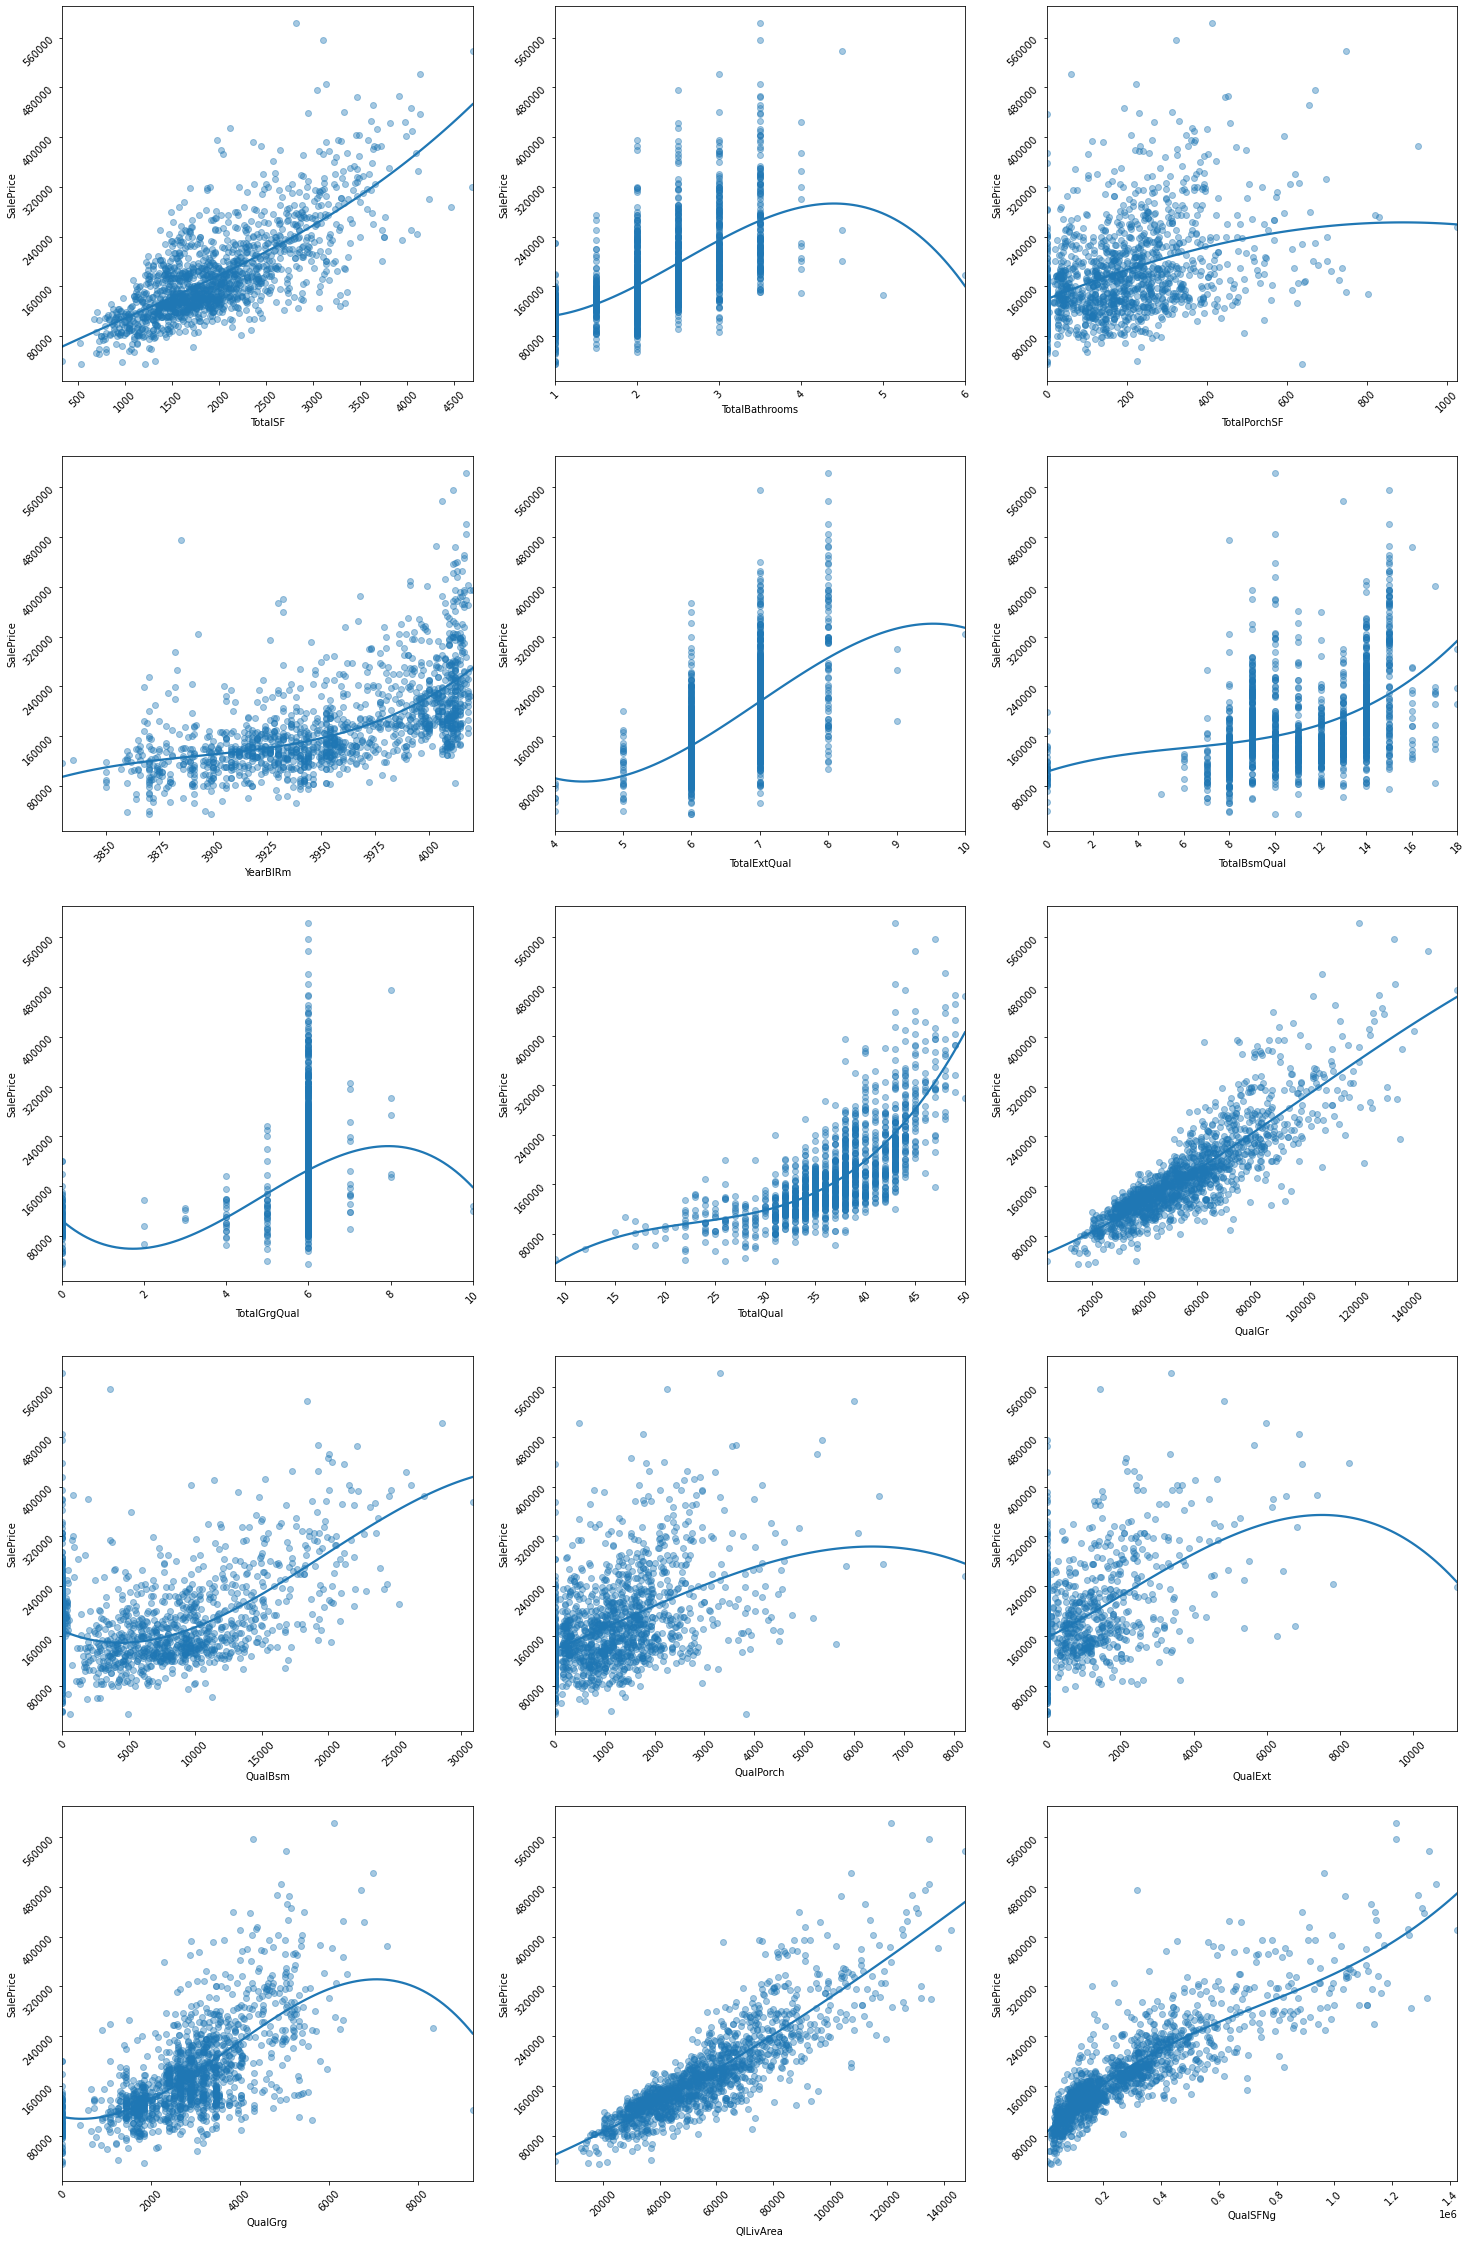

In [29]:
srt_reg('SalePrice')

#### Выводы
- Новые признаки выглядят достаточно прилично, возможно, они помогут построить хорошие модели. Также можно добавить еще несколько признаков, показывающих наличие или отсутствие бассейна, гаража и т.д..

In [30]:
features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['HasGarage'] = features['QualGrg'].apply(lambda x: 1 if x > 0 else 0)
features['HasBsmt'] = features['QualBsm'].apply(lambda x: 1 if x > 0 else 0)
features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
features['HasPorch'] = features['QualPorch'].apply(lambda x: 1 if x > 0 else 0)

## Преобразование данных

Некоторые из непрерывных значений распределяются неравномерно и не соответствуют нормальному распределению, можно исправить это, используя boxcox преобразование.

Перечислим искаженные функции, а затем применим преобразование boxcox с помощью boxcox_normmax.

In [31]:
features.select_dtypes(include=['int64', 'float64']).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'TotalSF', 'TotalBathrooms', 'TotalPorchSF', 'YearBlRm', 'TotalQual',
       'QualGr', 'QualBsm', 'QualPorch', 'QualExt', 'QualGrg', 'QlLivArea',
       'QualSFNg', 'HasPool', 'Has2ndFloor', 'HasGarage', 'HasBsmt',
       'HasFireplace', 'HasPorch'],
      dtype='object')

In [32]:
skewed = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'LowQualFinSF', 'MiscVal']

In [33]:
skew_features = np.abs(features[skewed].apply(lambda x: skew(x)).sort_values(ascending=False))
high_skew = skew_features[skew_features > 0.3]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

Отбрасываем некоторые ненужные признаки. Затем кодируем оставшиеся категориальные данные.

In [34]:
# Ненужные признаки 

to_drop = [
    'Utilities',
    'PoolQC',
    'YrSold',
    'MoSold',
    'ExterQual',
    'BsmtQual',
    'GarageQual',
    'KitchenQual',
    'HeatingQC']

features.drop(columns=to_drop, inplace=True)

In [35]:
features = pd.get_dummies(data=features)

In [36]:
features.shape

(2908, 226)

# Проверка данных

In [37]:
print(f'Number of missing values: {features.isna().sum().sum()}')

Number of missing values: 0


In [38]:
features.shape

(2908, 226)

In [39]:
features.describe()

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,BsmtCond,...,SaleType_ConLD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,...,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000
mean,18.932141,14.236976,4.455640,6.081843,5.566713,1971.252751,1984.227992,8.183115,3.085282,2.918157,...,0.008597,0.081155,0.009972,0.866231,0.064993,0.004127,0.008253,0.015818,0.823590,0.083219
std,3.698921,1.155737,2.457431,1.397639,1.114074,30.296319,20.899483,11.176755,0.372262,0.576014,...,0.092336,0.273121,0.099380,0.340462,0.246556,0.064117,0.090486,0.124794,0.381234,0.276260
min,8.809473,10.151043,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.482486,13.809915,3.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,19.280167,14.351058,4.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,20.976649,14.815541,5.000000,7.000000,6.000000,2001.000000,2004.000000,18.086736,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,48.749449,22.753411,10.000000,10.000000,9.000000,2010.000000,2010.000000,51.503131,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Делим данные на train и test наборы

train = features.iloc[:len(y), :]
test = features.iloc[len(train):, :]

In [41]:
def plot_dist3(df, feature, title):  
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))   
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1)
    ax1.legend(labels=['Normal', 'Actual'])  
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Probability Plot')
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markersize(12.0)
    
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

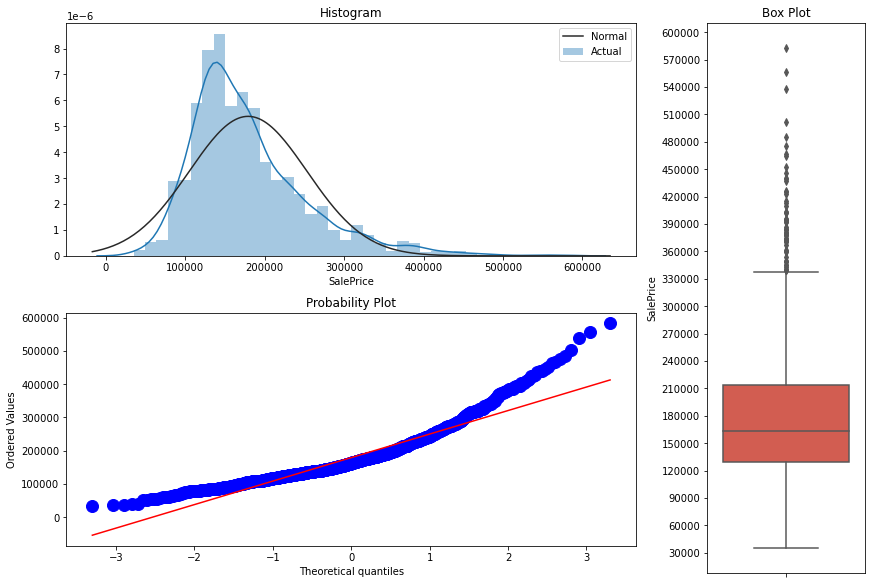

In [42]:
# Проверка целевой переменной.

plot_dist3(train.join(y), 'SalePrice', 'Sale Price Before Log Transformation')

Наше целевое распределение значений кажется немного искаженным. Можно исправить это, применив log преобразование, чтобы модели работали лучше.

In [43]:
X = train
X_test = test
y = np.log1p(y)

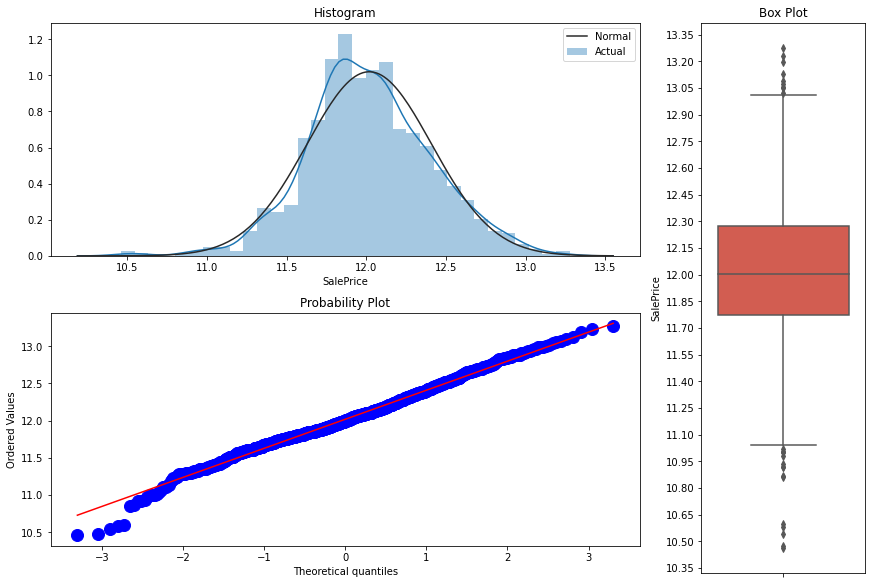

In [44]:
plot_dist3(train.join(y), 'SalePrice', 'Sale Price After Log Transformation')

# Моделирование

Будем использовать следующие регрессоры:
- Ridge,
- Lasso,
- Elasticnet,
- Support Vector Regression
- Gradient Boosting Regressor
- LightGBM Regressor
- XGBoost Regressor
- Hist Gradient Boosting Regressor
- Tweedie Regressor

In [45]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, TweedieRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor

In [46]:
# Устанавливаем kfold

kf = KFold(10)

In [47]:
# Параметры для Ridge, Lasso и Elasticnet.

alphas_alt = [15.5, 15.6, 15.7, 15.8, 15.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

# ridge_cv

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kf))

# lasso_cv:

lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kf))

# elasticnet_cv:

elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kf, random_state=42, 
                                                        l1_ratio=e_l1ratio))

# svr:

svr = make_pipeline(RobustScaler(), SVR(C=21, epsilon=0.0099, gamma=0.00017, tol=0.000121))

# gradientboosting:

gbr = GradientBoostingRegressor(n_estimators=2900,
                                learning_rate=0.0161,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=17,
                                loss='huber',
                                random_state=42)

# lightgbm:

lightgbm = LGBMRegressor(objective='regression',
                         n_estimators=3500,
                         num_leaves=5,
                         learning_rate=0.00721,
                         max_bin=163,
                         bagging_fraction=0.35711,
                         n_jobs=-1,
                         bagging_seed=42,
                         feature_fraction_seed=42,
                         bagging_freq=7,
                         feature_fraction=0.1294,
                         min_data_in_leaf=8)

# xgboost:

xgboost = XGBRegressor(
    learning_rate=0.0139,
    n_estimators=4500,
    max_depth=4,
    min_child_weight=0,
    subsample=0.7968,
    colsample_bytree=0.4064,
    nthread=-1,
    scale_pos_weight=2,
    seed=42,
)


# hist gradient boosting regressor:

hgrd = HistGradientBoostingRegressor(loss= 'least_squares',
                                    max_depth= 2,
                                    min_samples_leaf= 40,
                                    max_leaf_nodes= 29,
                                    learning_rate= 0.15,
                                    max_iter= 225,
                                    random_state=42)

# tweedie regressor:
 
tweed = make_pipeline(RobustScaler(), TweedieRegressor(alpha=0.005))


# stacking regressor:

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr,
                                xgboost, lightgbm,hgrd, tweed),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

# Перекрестная проверка

In [48]:
def model_check(X, y, estimators, cv):
    ''' Функция для тестирования нескольких моделей.'''
    
    model_table = pd.DataFrame()

    row_index = 0
    for est, label in zip(estimators, labels):
        MLA_name = label
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(est,
                                    X,
                                    y,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error',
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index, 'Train RMSE'] = -cv_results['train_score'].mean()
        model_table.loc[row_index, 'Test RMSE'] = -cv_results['test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test RMSE'],
                            ascending=True,
                            inplace=True)

    return model_table

In [49]:
estimators = [ridge, lasso, elasticnet, gbr, xgboost, lightgbm, svr, hgrd, tweed]
labels = [
    'Ridge', 'Lasso', 'Elasticnet', 'GradientBoostingRegressor',
    'XGBRegressor', 'LGBMRegressor', 'SVR', 'HistGradientBoostingRegressor','TweedieRegressor']

# Результаты

Модели довольно близки друг к другу. Возможно, некоторые модели переобучены, но поскольку будем смешивать модели, можно оставить их как есть.

In [50]:
raw_models = model_check(X, y, estimators, kf)
raw_models

,Model Name,Train RMSE,Test RMSE,Test Std,Time
1,Lasso,0.098274,0.107467,0.013279,7.647046
2,Elasticnet,0.098142,0.107480,0.013251,26.874186
0,Ridge,0.098369,0.109515,0.012668,7.938936
3,GradientBoostingRegressor,0.063738,0.109745,0.015977,52.607335
8,TweedieRegressor,0.096469,0.110196,0.012710,0.722328
6,SVR,0.098100,0.110531,0.013418,1.571669
4,XGBRegressor,0.012401,0.111889,0.014856,68.747715
5,LGBMRegressor,0.078282,0.112297,0.014662,5.483842
7,HistGradientBoostingRegressor,0.085606,0.115607,0.015563,3.166968


## Stacking and Blending

Подгоняем каждую отдельную модель, а затем смешиваем их, присваивая веса каждой модели и суммируя результаты.

In [51]:
print('StackingCVRegressor')
stack_gen_model = stack_gen.fit(X.values, y.values)
print('Elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)
print('Lasso')
lasso_model_full_data = lasso.fit(X, y)
print('Ridge')
ridge_model_full_data = ridge.fit(X, y)
print('SVR')
svr_model_full_data = svr.fit(X, y)
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)
print('XGboost')
xgb_model_full_data = xgboost.fit(X, y)
print('Lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)
print('Hist')
hist_full_data = hgrd.fit(X, y)
print('Tweed')
tweed_full_data = tweed.fit(X, y)

StackingCVRegressor
[LightGBM] [Warning] feature_fraction is set=0.1294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1294
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_fraction is set=0.35711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.35711
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.1294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1294
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_fraction is set=0.35711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.35711
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Wa

In [52]:
# Смешивание моделей путем присвоения весов

def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) +
            (0.1 * lasso_model_full_data.predict(X)) +
            (0.1 * ridge_model_full_data.predict(X)) +
            (0.1 * svr_model_full_data.predict(X)) +
            (0.05 * gbr_model_full_data.predict(X)) +
            (0.1 * xgb_model_full_data.predict(X)) +
            (0.05 * lgb_model_full_data.predict(X)) +
            (0.05 * hist_full_data.predict(X)) +
            (0.1 * tweed_full_data.predict(X)) +
            (0.25 * stack_gen_model.predict(X.values)))

## Предсказание

Предсказываем и представляем результаты для проверки на Kaggle.

In [53]:
submission = pd.read_csv('Housing_Prices_Competition/test.csv')

submission['SalePrice'] = np.floor(np.expm1(blend_models_predict(X_test)))

submission = submission[['Id', 'SalePrice']]

In [54]:
submission.head()

,Id,SalePrice
0,1461,118283.0
1,1462,159511.0
2,1463,187491.0
3,1464,197470.0
4,1465,187265.0


In [ ]:
submission.to_csv('Housing_Prices_Competition/submission.csv', index=False)

Теперь можем загрузить файл с предсказаниями (submission.csv) на Kaggle, чтобы проверить качество модели.

Эта модель попадает в топ 1% таблицы лидеров соревнования.